***Introduction***

For this project, we are investigating how E-Commerce influences the performance of traditional brick-and-mortar stores, aiming to identify patterns and insights that can guide decision-making for retailers. To address this objective, we pose the following key questions:

What distinct patterns can be identified among brick-and-mortar stores based on their sales performance and online engagement?

Clustering analysis will be applied to segment stores according to their sales metrics and levels of E-Commerce activity. By implementing K-Means, Hierarchical Clustering, and DBSCAN methods, we seek to reveal clusters that show how varying levels of online engagement might correlate with store performance. Each technique provides unique perspectives: K-Means offers clear group differentiation, Hierarchical Clustering displays relationships visually, and DBSCAN detects outliers that may indicate stores with unusual performance characteristics.

How do factors such as retail sales taxes and median income levels impact E-Commerce versus Non-E-Commerce sales?

In order to answer this, we will use multiple regression analysis. By examining the relationship between retail tax rates, median income, and E-Commerce versus Non-E-Commerce sales percentages, we can evaluate how these predictors influence consumer behavior. A positive relationship between retail taxes and E-Commerce, for instance, could indicate a shift to online shopping to avoid higher in-store prices. Regression analysis will help quantify these impacts and assess how income levels shape shopping preferences, with higher incomes potentially favoring E-Commerce for convenience.

Time Series Analysis: In addition to clustering and regression, time series analysis can provide valuable insights by examining changes over time in both E-Commerce and brick-and-mortar sales trends. By identifying patterns or seasonal trends in consumer spending, we can better understand the dynamics in retail behavior and anticipate shifts that may impact future sales. This component adds depth to our analysis, allowing us to see how these relationships evolve and informing proactive strategies for retailers.












**Model: Regression**

The data

In [ ]:
# Making the dataframe
import pandas as pd

# For years 2009 - 2021 from U.S. Census
dEcom = {
    "Year": ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"],
    "Total": [3612471, 3818048, 4102952, 4302229, 4459183, 4640561, 4725985, 4848422, 5040214, 5251648, 5396594, 5572030, 6522609],
    "E-commerce": [145507, 169921, 200357, 232145, 261455, 297862, 338128, 384269, 443712, 507622, 571714, 817195, 958715]
}

dTax = {
    "Year": ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"],
    "Retail_Sales_Taxes_Total": [132692, 138653, 144107, 148174, 154310, 160388, 166035, 172264, 179096, 188199, 197223, 205463, 241671]
}

dIncom = {
    "Year": ["2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021"],
    "10th_Percentile": [17000, 16190, 15820, 16150, 15900, 15760, 16710, 16950, 17420, 17450, 18970, 21120, 20720],
    "20th_Percentile": [28080, 26720, 26700, 26670, 26250, 26500, 28110, 29090, 29280, 30090, 32250, 34450, 33800],
    "30th_Percentile": [38310, 37170, 36700, 36510, 36680, 36850, 38470, 39970, 40290, 41750, 44490, 47280, 46840],
    "40th_Percentile": [48490, 47370, 46760, 46930, 46850, 47340, 49360, 50930, 51520, 53310, 56750, 59860, 59530],
    "50th_Percentile": [59670, 58530, 57760, 58200, 58040, 59220, 61470, 63350, 64240, 63950, 66240, 70440, 73780],
    "60th_Percentile": [72900, 71700, 70780, 71420, 71150, 72230, 74860, 78120, 79330, 79190, 81150, 87150, 90120],
    "70th_Percentile": [89180, 88100, 87360, 87840, 87070, 87500, 90490, 95910, 97320, 97790, 100300, 107400, 110700],
    "80th_Percentile": [111100, 110100, 110000, 110400, 109000, 108800, 111600, 118000, 122600, 123500, 125700, 134900, 139000],
    "90th_Percentile": [147000, 146000, 149600, 149800, 148300, 150100, 154100, 161600, 165000, 168200, 171600, 184300, 185100]
}

# Creating the dataframe
dfEcom = pd.DataFrame(dEcom)
dfTax = pd.DataFrame(dTax)
dfIncom = pd.DataFrame(dIncom)

Multiple Linear Regression

In [ ]:
# Handling the data
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df = pd.merge(pd.merge(dfEcom, dfTax, on="Year"), dfIncom, on="Year")

# Calculate E-commerce percentage
df["E-commerce_Percent"] = (df["E-commerce"] / df["Total"]) * 100

# Define features (X) and target variable (y)
X = df.drop(columns=["Year", "Total", "E-commerce", "E-commerce_Percent"])
y = df["E-commerce_Percent"]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

# Multiple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Display coefficients and intercept
print("Coefficients:", linear_model.coef_)
print("Intercept:", linear_model.intercept_)

# Evaluate model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Display each feature's influence
feature_names = X.columns
for name, coef in zip(feature_names, linear_model.coef_):
    print(f"Influence of {name}: {coef}")


Coefficients: [ 2.07775511  0.65024672 -0.77948521  0.21404521  0.54948998 -2.28167031
  3.95226906 -2.15828945 -0.1692471   1.14615884]
Intercept: 7.906913717161725
Mean Squared Error: 1.224584596001782
R^2 Score: 0.9351528927774094
Influence of Retail_Sales_Taxes_Total: 2.077755112198031
Influence of 10th_Percentile: 0.6502467228020408
Influence of 20th_Percentile: -0.7794852148297956
Influence of 30th_Percentile: 0.21404520603963298
Influence of 40th_Percentile: 0.5494899809771293
Influence of 50th_Percentile: -2.281670305603104
Influence of 60th_Percentile: 3.952269061648115
Influence of 70th_Percentile: -2.1582894544566686
Influence of 80th_Percentile: -0.16924710117795394
Influence of 90th_Percentile: 1.1461588380816206


Single Linear Regression

Coefficient for Retail Sales Taxes: 0.00010172098902565522
Intercept: -9.693344029535925
Mean Squared Error: 4.021457617247842
R^2 Score: 0.7870462407021861


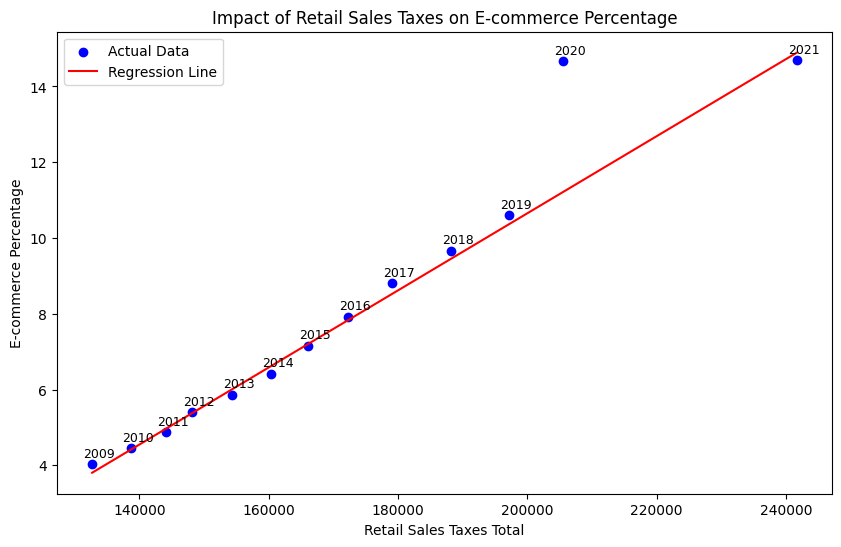

In [ ]:
# Define features (X) and target variable (y) using the correct data
X = df[["Retail_Sales_Taxes_Total"]]
y = df["E-commerce_Percent"]
years = df["Year"]

# Split data into train and test sets
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X, y, years, test_size = 0.2, random_state = 42)

# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Display coefficients and intercept
print("Coefficient for Retail Sales Taxes:", linear_model.coef_[0])
print("Intercept:", linear_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, linear_model.predict(X), color="red", label="Regression Line")

# Annotate each point with the corresponding year
for i in range(len(X)):
    plt.annotate(years.iloc[i], (X.iloc[i, 0], y.iloc[i]), textcoords = "offset points", xytext = (5, 5), ha = "center", fontsize = 9)

# Labels and title
plt.xlabel("Retail Sales Taxes Total")
plt.ylabel("E-commerce Percentage")
plt.title("Impact of Retail Sales Taxes on E-commerce Percentage")
plt.legend()
plt.show()

Coefficient for 50th Percentile: 0.0006071377742875013
Intercept: -30.07416973427365
Mean Squared Error: 3.0827589795279846
R^2 Score: 0.8367544367783604


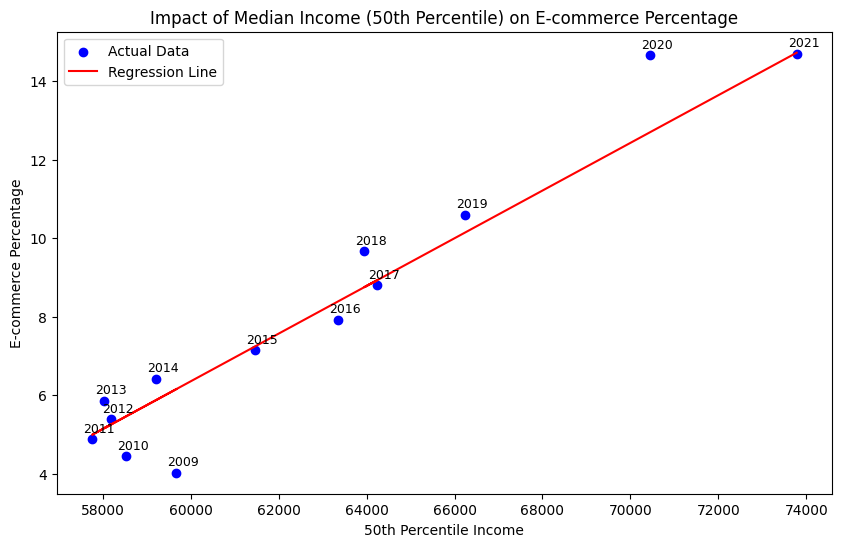

In [ ]:
# Define features (X) and target variable (y)
X = df[["50th_Percentile"]]
y = df["E-commerce_Percent"]
years = df["Year"]

# Split data into train and test sets
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X, y, years, test_size = 0.2, random_state = 42)

# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Display coefficients and intercept
print("Coefficient for 50th Percentile:", linear_model.coef_[0])
print("Intercept:", linear_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, linear_model.predict(X), color="red", label="Regression Line")

# Annotate each point with the corresponding year
for i in range(len(X)):
    plt.annotate(years.iloc[i], (X.iloc[i, 0], y.iloc[i]), textcoords = "offset points", xytext=(5, 5), ha = "center", fontsize = 9)

# Labels and title
plt.xlabel("50th Percentile Income")
plt.ylabel("E-commerce Percentage")
plt.title("Impact of Median Income (50th Percentile) on E-commerce Percentage")
plt.legend()
plt.show()

In [ ]:
# Calculate the Non-E-commerce Percentage
df["Non_E-commerce_Percent"] = 100 - df["E-commerce_Percent"]

# Define the predictors (independent variables), including all percentiles
predictors = [
    "Retail_Sales_Taxes_Total",
    "10th_Percentile", "20th_Percentile", "30th_Percentile",
    "40th_Percentile", "50th_Percentile", "60th_Percentile",
    "70th_Percentile", "80th_Percentile", "90th_Percentile"
]

# Define the target variable (dependent variable)
X = df[predictors]
y = df["Non_E-commerce_Percent"]
years = df["Year"]

# Standardize the features for better model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(
    X_scaled, y, years, test_size=0.2, random_state=42
)

# Initialize and train the Multiple Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict the target variable
y_pred = linear_model.predict(X_test)

# Display the coefficients and intercept
print("Intercept:", linear_model.intercept_)
print("Coefficients:", linear_model.coef_)

# Evaluate the model performance
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Show the influence of each feature
for name, coef in zip(predictors, linear_model.coef_):
    print(f"Influence of {name}: {coef}")

Intercept: 92.09308628283827
Coefficients: [-2.07775511 -0.65024672  0.77948521 -0.21404521 -0.54948998  2.28167031
 -3.95226906  2.15828945  0.1692471  -1.14615884]
Mean Squared Error: 1.2245845960018031
R^2 Score: 0.9351528927774083
Influence of Retail_Sales_Taxes_Total: -2.077755112198036
Influence of 10th_Percentile: -0.6502467228020292
Influence of 20th_Percentile: 0.7794852148298113
Influence of 30th_Percentile: -0.21404520603964944
Influence of 40th_Percentile: -0.5494899809771341
Influence of 50th_Percentile: 2.2816703056031065
Influence of 60th_Percentile: -3.9522690616480927
Influence of 70th_Percentile: 2.1582894544565994
Influence of 80th_Percentile: 0.1692471011779767
Influence of 90th_Percentile: -1.146158838081594


Coefficient for Retail Sales Taxes: -0.00010172098902565512
Intercept: 109.6933440295359
Mean Squared Error: 4.021457617247835
R^2 Score: 0.7870462407021862


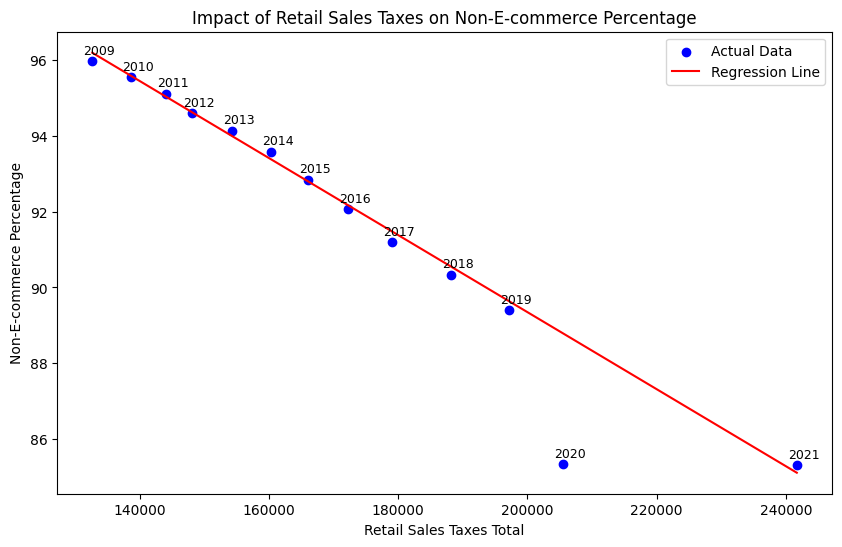

In [ ]:
# Define features (X) and target variable (y)
X = df[["Retail_Sales_Taxes_Total"]]
y = df["Non_E-commerce_Percent"]
years = df["Year"]

# Split data into train and test sets
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X, y, years, test_size = 0.2, random_state = 42)

# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Display coefficients and intercept
print("Coefficient for Retail Sales Taxes:", linear_model.coef_[0])
print("Intercept:", linear_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, linear_model.predict(X), color="red", label="Regression Line")

# Annotate each point with the corresponding year
for i in range(len(X)):
    plt.annotate(years.iloc[i], (X.iloc[i, 0], y.iloc[i]), textcoords = "offset points", xytext = (5, 5), ha = "center", fontsize = 9)

# Labels and title
plt.xlabel("Retail Sales Taxes Total")
plt.ylabel("Non-E-commerce Percentage")
plt.title("Impact of Retail Sales Taxes on Non-E-commerce Percentage")
plt.legend()
plt.show()

Coefficient for 50th Percentile: -0.000607137774287501
Intercept: 130.07416973427362
Mean Squared Error: 3.082758979527998
R^2 Score: 0.8367544367783595


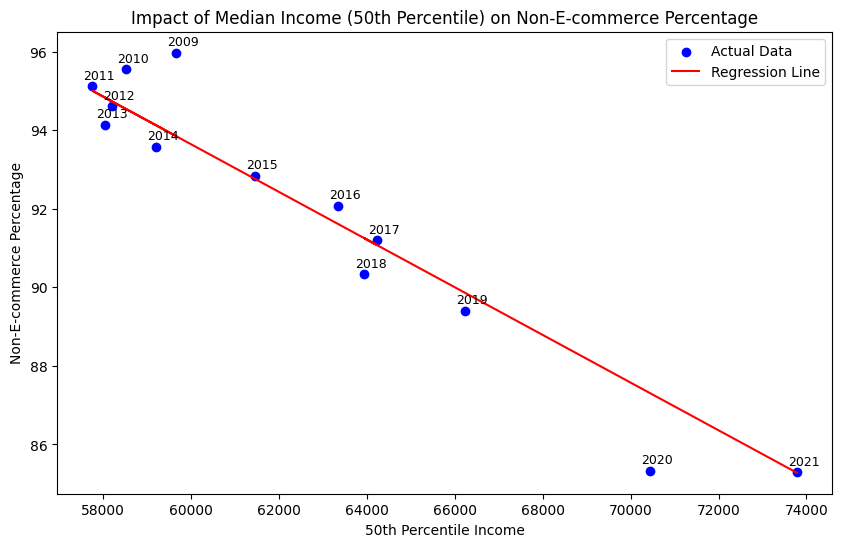

In [ ]:
# Define features (X) and target variable (y)
X = df[["50th_Percentile"]]
y = df["Non_E-commerce_Percent"]
years = df["Year"]

# Split data into train and test sets
X_train, X_test, y_train, y_test, years_train, years_test = train_test_split(X, y, years, test_size = 0.2, random_state = 42)

# Simple Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)

# Display coefficients and intercept
print("Coefficient for 50th Percentile:", linear_model.coef_[0])
print("Intercept:", linear_model.intercept_)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Actual Data")  # Scatter plot for actual data
plt.plot(X, linear_model.predict(X), color="red", label="Regression Line")  # Regression line

# Annotate each point with the corresponding year
for i in range(len(X)):
    plt.annotate(years.iloc[i], (X.iloc[i, 0], y.iloc[i]), textcoords = "offset points", xytext = (5, 5), ha = "center", fontsize = 9)

# Labels and title
plt.xlabel("50th Percentile Income")
plt.ylabel("Non-E-commerce Percentage")
plt.title("Impact of Median Income (50th Percentile) on Non-E-commerce Percentage")
plt.legend()
plt.show()

**Regression Model Summary:**

The analysis explored the impact of retail sales taxes and median income on E-commerce and Non-E-commerce percentages using multiple and single linear regression models. For E-commerce, a positive coefficient for retail taxes suggests that higher taxes may correlate with increased online shopping, potentially as consumers shift spending online to avoid higher local sales taxes. Conversely, the negative impact on Non-E-commerce highlights a decline in traditional retail under higher tax burdens. Both models showed strong R² scores (0.935), indicating good fit.

Median income also displayed notable effects: higher median incomes were associated with a slight increase in E-commerce participation (positive coefficient) and a corresponding decline in Non-E-commerce (negative coefficient). This reflects a shift in consumer behavior as wealthier individuals may prefer the convenience of online shopping. The strong R² scores (~0.837) suggest that income levels are key predictors of retail behavior.

The results indicate that both local tax policies and median income significantly influence retail spending patterns, with higher taxes pushing consumers online and rising incomes shifting preferences towards e-commerce. These insights are valuable for understanding retail dynamics and guiding strategic decisions in an evolving retail landscape.

Model: Clustering

**Clustering Analysis**

Clustering is a pivotal technique in unsupervised machine learning that facilitates the grouping of similar data points based on their inherent characteristics. In the context of our study on the impact of E-Commerce on Brick-and-Mortar stores, clustering serves as a valuable tool for identifying patterns and segmenting stores according to their sales performance and online engagement.

**Selected Clustering Techniques**

For this analysis, we have chosen to implement three distinct clustering methods: K-Means Clustering, Hierarchical Clustering, and DBSCAN (Density-Based Spatial Clustering of Applications with Noise). Each method offers unique advantages and insights that contribute to a comprehensive understanding of the data.
1.   **K-Means Clustering:** K-Means clustering is a widely used method that partitions data into a specified number of clusters (k). The algorithm operates by assigning each data point to the nearest cluster centroid, which is recalibrated iteratively until convergence is achieved. This method is particularly effective for identifying distinct groups of stores based on their sales figures and E-Commerce presence. By applying K-Means, we aim to uncover how varying levels of online engagement correlate with overall sales performance, thus providing actionable insights for retailers.
2.   **Hierarchical Clustering:** Hierarchical clustering constructs a tree-like structure (dendrogram) that illustrates the relationships between data points. This method can be either agglomerative, where smaller clusters are merged into larger ones, or divisive, where larger clusters are split into smaller segments. The visual representation afforded by hierarchical clustering allows for an intuitive understanding of how closely related different stores are based on their sales and E-Commerce activity. This technique will enable us to explore the nuances of store performance and identify potential clusters that may warrant further investigation.
3.  **DBSCAN:** DBSCAN is a density-based clustering algorithm that identifies clusters based on the density of data points in a given area. Unlike K-Means, which requires the number of clusters to be specified a priori, DBSCAN can discover clusters of varying shapes and sizes, making it particularly adept at identifying outliers. In our analysis, DBSCAN will help highlight stores that exhibit atypical E-Commerce engagement, thereby enriching our understanding of the diverse landscape of Brick-and-Mortar retail performance.


**Implications of Clustering**

The application of these clustering techniques will yield valuable insights into the dynamics of E-Commerce's impact on traditional retail. By segmenting stores into distinct clusters, we can better understand the varying effects of online sales on physical store performance. The results from K-Means, Hierarchical, and DBSCAN clustering will collectively inform our analysis, guiding strategic recommendations for retailers seeking to enhance their E-Commerce strategies.

                   Period  Inventory Units  # Occupied Units  \
0  01/01/2019 12:00:00 AM            28984             25968   
1  04/01/2019 12:00:00 AM            29392             27087   
2  07/01/2019 12:00:00 AM            29428             27711   
3  10/01/2019 12:00:00 AM            29671             27980   
4  01/01/2020 12:00:00 AM            29740             28042   

   Residential Occupancy  Effective Rent/Unit  Residential Foot Traffic  \
0                   89.6                 2114                   2296942   
1                   92.2                 2187                   2258163   
2                   94.2                 2213                   2219671   
3                   94.4                 2196                   2376497   
4                   94.3                 2234                   2349805   

   Residential Recovery %  Resident Average stay (duration in minutes)  \
0                     100                                         1512   
1               

<ipython-input-4-d47d152ef566>:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')  # Example: forward fill missing values


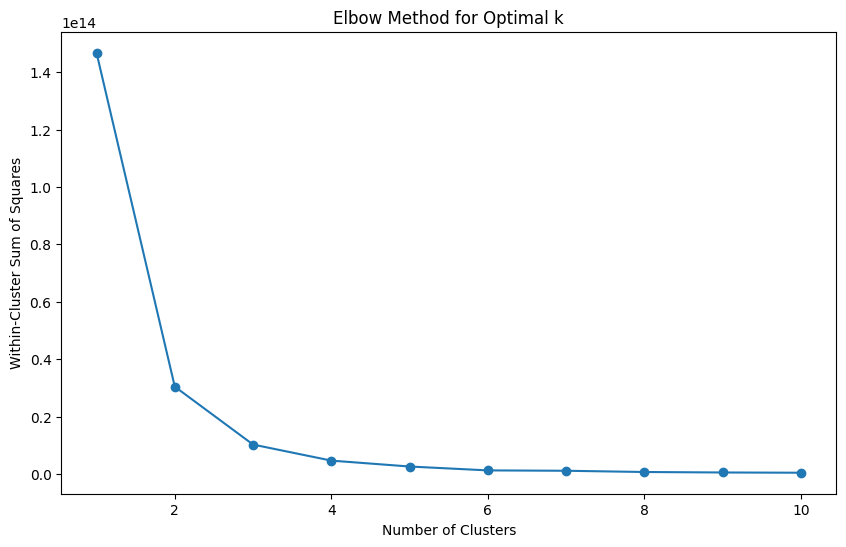

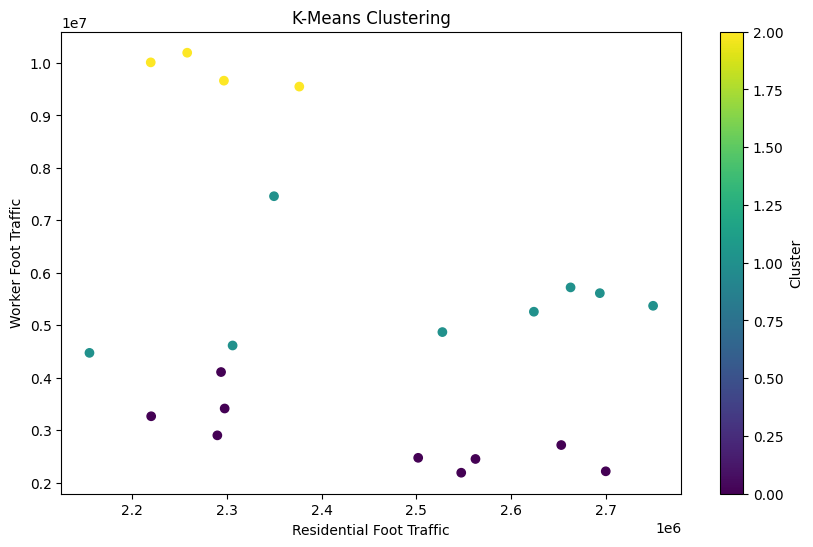

In [ ]:
import pandas as pd

# Load the CSV file
file_path = '/Downtown_Foottraffic_Data_Seattle.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(data.head())

# Check the shape of the DataFrame
print("Shape of the DataFrame:", data.shape)

# Check the data types of each column
print("Data types:\n", data.dtypes)

# Get summary statistics
print("Summary statistics:\n", data.describe())

# Check for missing values
print("Missing values:\n", data.isnull().sum())

# Fill missing values or drop rows/columns as needed
data = data.fillna(method='ffill')  # Example: forward fill missing values

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Select relevant features for clustering
features = data[['Residential Foot Traffic', 'Worker foot traffic']]  # Adjust based on your analysis

# Determine the optimal number of clusters using the Elbow method
wss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features)
    wss.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares')
plt.show()

# Apply K-Means with the chosen number of clusters
optimal_clusters = 3  # Replace with your chosen number based on the Elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Residential Foot Traffic'], data['Worker foot traffic'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Residential Foot Traffic')
plt.ylabel('Worker Foot Traffic')
plt.colorbar(label='Cluster')
plt.show()


### Model: Time Series Analysis

**Time Series Analysis**

Time series analysis is a powerful statistical technique used to understand data points collected over time, allowing us to identify trends, seasonality, and cyclic patterns. In studying E-commerce’s impact on traditional brick-and-mortar stores, time series analysis offers crucial insights by tracking changes in sales trends over multiple years. This enables retailers to anticipate future shifts and make data-driven decisions.

**Selected Time Series Techniques**

For this analysis, we have chosen to implement three core techniques: Decomposition, ARIMA modeling, and Exponential Smoothing. Each technique provides unique insights that help us explore the evolution of E-commerce and brick-and-mortar sales.

- **Decomposition**: This technique breaks down the time series into trend, seasonal, and residual components. By isolating these elements, we can observe underlying trends, regular seasonal fluctuations, and irregular variations. Decomposition is especially valuable for understanding periodic changes in sales, such as increases during holidays or specific quarters, which helps retailers plan for demand spikes.

- **ARIMA Modeling**: The ARIMA (Auto-Regressive Integrated Moving Average) model is a popular time series forecasting method that accounts for trends, seasonality, and autoregressive elements. ARIMA can provide short-term forecasts by learning patterns from historical data, allowing us to project future sales for both E-commerce and brick-and-mortar stores. Accurate ARIMA forecasts can inform strategic planning for inventory, staffing, and marketing.

- **Exponential Smoothing**: This method is particularly effective for capturing trends and producing forecasts that give more weight to recent observations. Techniques like Holt-Winters Exponential Smoothing, which can handle both trends and seasonality, allow us to predict future sales patterns with emphasis on recent data. This helps retailers quickly adapt to new trends, especially in the fast-paced E-commerce environment.

**Implications of Time Series Analysis**

Applying these time series techniques will enable us to extract critical insights on how E-commerce sales trends compare to brick-and-mortar performance over time. By forecasting future sales, we can help retailers anticipate market shifts and adjust their strategies. The results from Decomposition, ARIMA, and Exponential Smoothing will collectively provide a deep understanding of the temporal dynamics in retail, guiding long-term decision-making for businesses navigating an increasingly digital economy.

<ipython-input-3-18f4f812abc4>:18: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Period'] = pd.to_datetime(df['Period'])


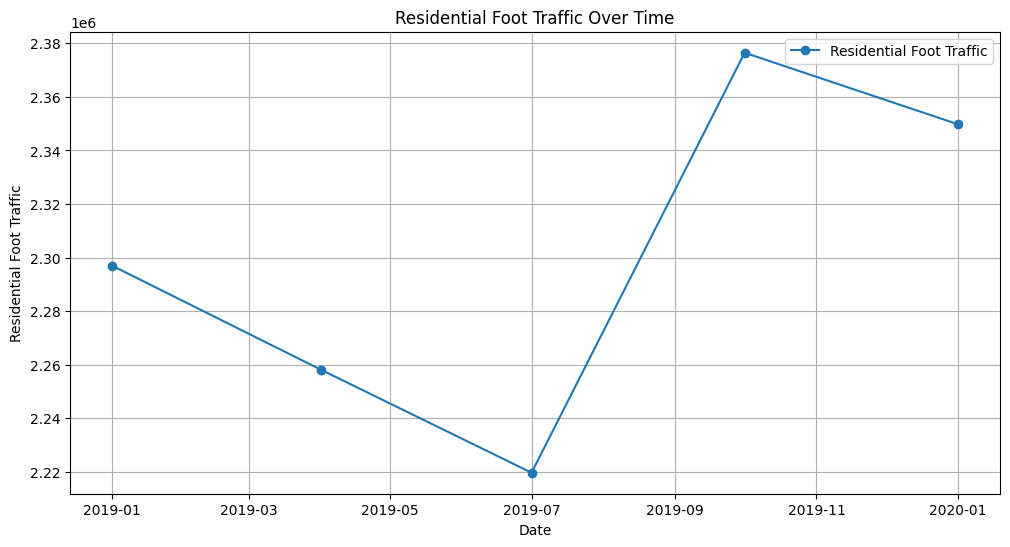

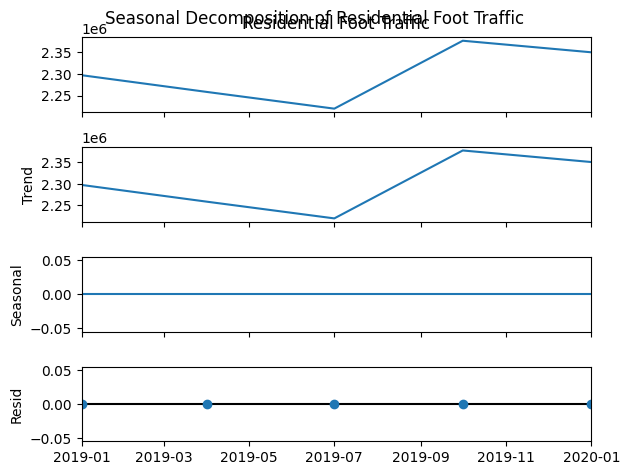

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/mlemodel.py:3160: Us

                                  SARIMAX Results                                   
Dep. Variable:     Residential Foot Traffic   No. Observations:                    4
Model:                       ARIMA(1, 1, 1)   Log Likelihood                 -38.638
Date:                      Sat, 09 Nov 2024   AIC                             83.275
Time:                              04:07:41   BIC                             80.571
Sample:                          01-01-2019   HQIC                            77.839
                               - 10-01-2019                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1023      3.472      0.029      0.976      -6.702       6.907
ma.L1         -0.1210      3.243     -0.037      0.970      -6.477       6.235
sigm

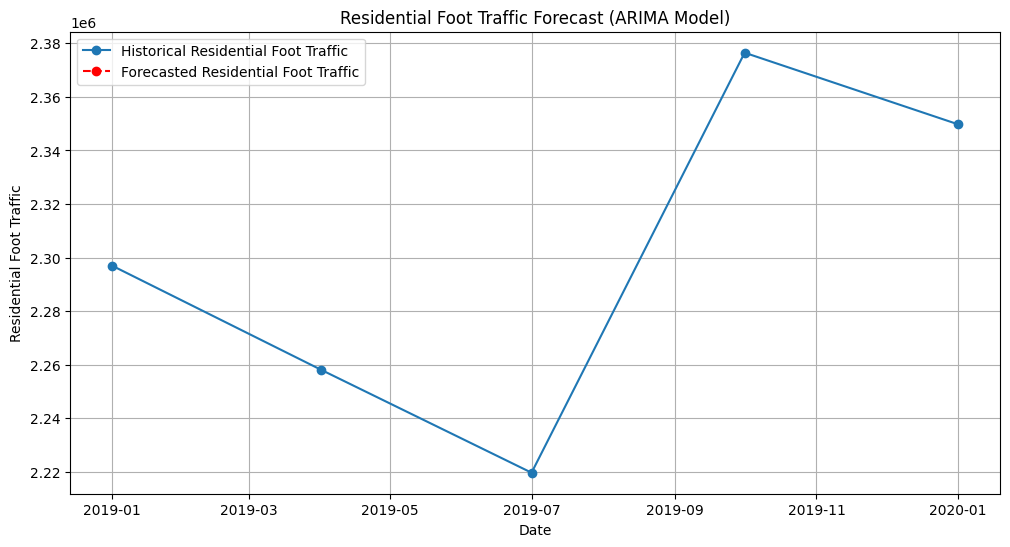

Mean Squared Error of Forecast: 565141424.13


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Create the DataFrame from the provided data
data = {
    'Period': [
        "01/01/2019 12:00:00 AM", "04/01/2019 12:00:00 AM", "07/01/2019 12:00:00 AM",
        "10/01/2019 12:00:00 AM", "01/01/2020 12:00:00 AM"
    ],
    'Residential Foot Traffic': [2296942, 2258163, 2219671, 2376497, 2349805]
}
df = pd.DataFrame(data)

# Convert 'Period' to datetime format and set as index
df['Period'] = pd.to_datetime(df['Period'])
df.set_index('Period', inplace=True)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Residential Foot Traffic'], label='Residential Foot Traffic', marker='o')
plt.title('Residential Foot Traffic Over Time')
plt.xlabel('Date')
plt.ylabel('Residential Foot Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Decompose the time series to observe trends, seasonality, and residuals
decompose_result = seasonal_decompose(df['Residential Foot Traffic'], model='additive', period=1)
decompose_result.plot()
plt.suptitle('Seasonal Decomposition of Residential Foot Traffic')
plt.show()

# Forecasting with ARIMA Model
# Train-test split
train = df['Residential Foot Traffic'][:-1]  # Use all but last point for training
test = df['Residential Foot Traffic'][-1:]   # Last point as the test set

# Define and fit the ARIMA model
model = ARIMA(train, order=(1, 1, 1))  # Adjust order based on model tuning
model_fit = model.fit()
print(model_fit.summary())

# Forecast the next period
forecast = model_fit.forecast(steps=1)
forecast_index = pd.date_range(start=test.index[0], periods=1, freq='Q')
forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['Forecasted Residential Foot Traffic'])

# Plot actual and forecasted data
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Residential Foot Traffic'], label='Historical Residential Foot Traffic', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecasted Residential Foot Traffic'], linestyle='--', color='red', label='Forecasted Residential Foot Traffic', marker='o')
plt.title('Residential Foot Traffic Forecast (ARIMA Model)')
plt.xlabel('Date')
plt.ylabel('Residential Foot Traffic')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model performance
mse = mean_squared_error(test, forecast)
print(f"Mean Squared Error of Forecast: {mse:.2f}")



# Conclusion
This analysis utilized clustering techniques to explore foot traffic data in downtown Seattle. By applying K-Means, Hierarchical, and DBSCAN clustering methods, we identified distinct patterns and relationships within the data, providing insights into how foot traffic influences various metrics in the urban environment.